In [1]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os
import sys
import datetime

root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)
    

load_dotenv()

True

In [2]:

from keras.models import Model, load_model

from utils.utils import plot_accuracy

In [3]:
# load datasets
from utils.utils import date_range, preprocess_c, data_descale

df_test = pd.concat([
    pd.read_csv(f'../datasets/d{d.strftime("%Y-%m-%d")}.csv') for d in date_range(
        datetime.date(2019, 11, 24), 
        datetime.date(2019, 12, 10),
        datetime.timedelta(days=1),
    )
])

X1_test, X2_test, y_test = preprocess_c(df_test)

X1_test.shape, X2_test.shape, y_test.shape

((284006, 1, 3), (284006, 14, 3), (284006, 3))

8876/8876 [==============================] - 12s 1ms/step


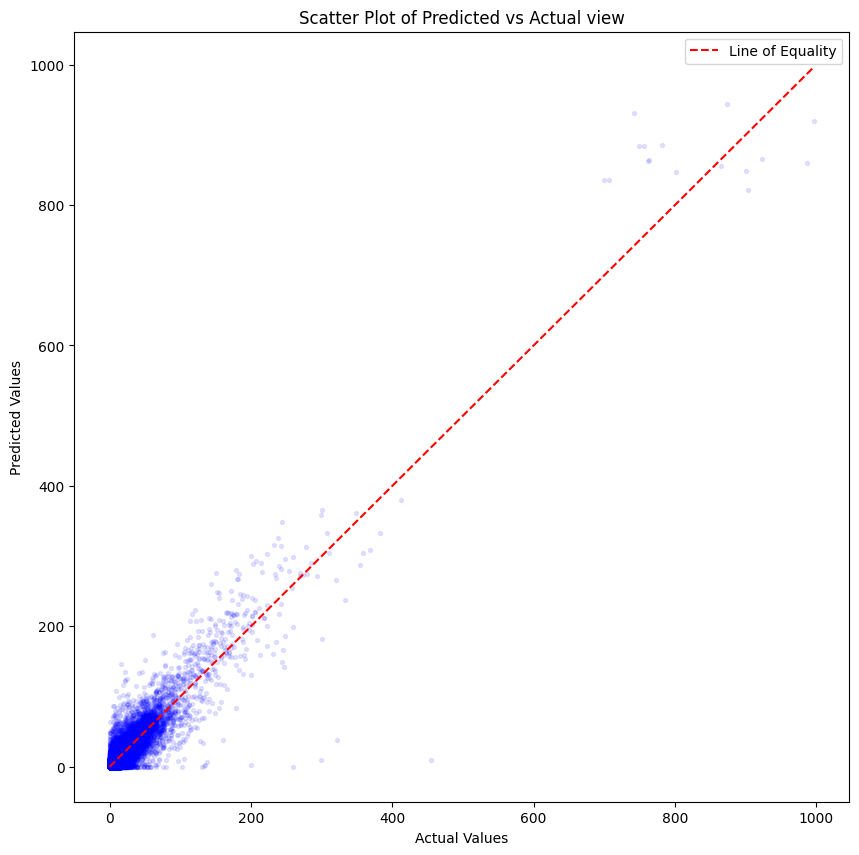

In [4]:
# test predict view
model_view: Model = load_model('../model/c-view.keras')
p_view = model_view.predict([X1_test, X2_test])
p_view = data_descale(p_view[:, 0], 'view')
plot_accuracy(p_view, df_test['view'], "view")


8876/8876 [==============================] - 11s 1ms/step


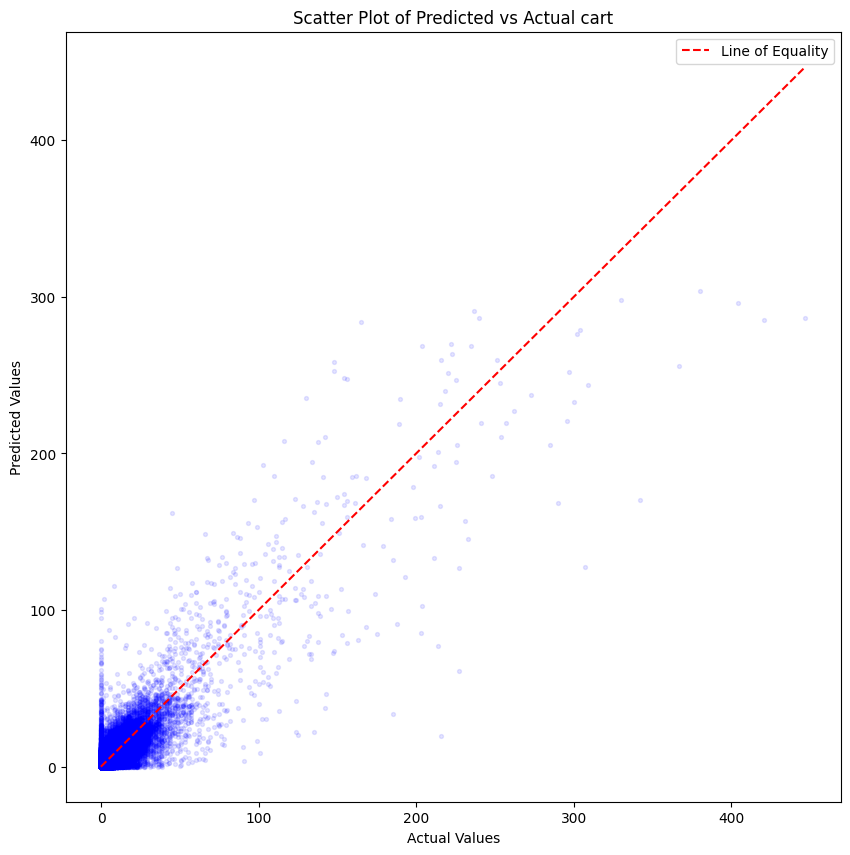

In [5]:
# test predict cart
model_cart: Model = load_model('../model/c-cart.keras')
p_cart = model_cart.predict([X1_test, X2_test])
p_cart = data_descale(p_cart[:, 0], 'cart')
plot_accuracy(p_cart, df_test['cart'], "cart")

8876/8876 [==============================] - 12s 1ms/step


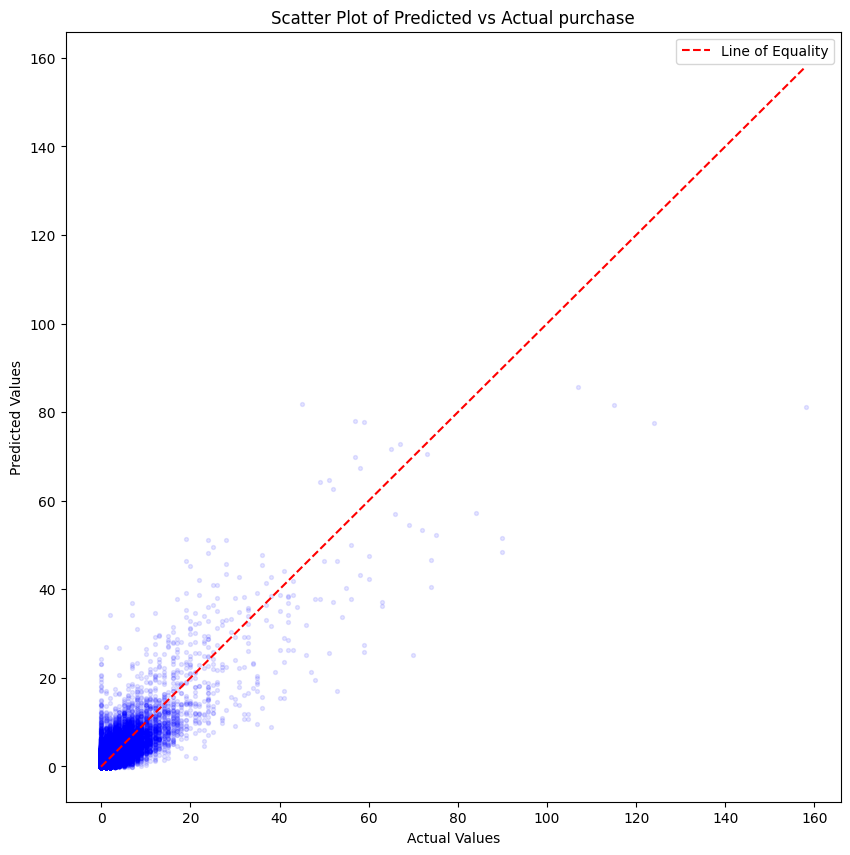

In [6]:
# test predict purchase
model_purchase: Model = load_model('../model/c-purchase.keras')
p_purchase = model_purchase.predict([X1_test, X2_test])
p_purchase = data_descale(p_purchase[:, 0], 'purchase')
plot_accuracy(p_purchase, df_test['purchase'], "purchase")

In [7]:
# concatenate and save to CSV
df = pd.DataFrame({ 
    'predicted_view': p_view,
    'actual_view': df_test['view'],
    'predicted_cart': p_cart,
    'actual_cart': df_test['cart'],
    'predicted_purchase': p_purchase,
    'actual_purchase': df_test['purchase'],
})
df.to_csv('../.data/test/c-test.csv')